<a href="https://colab.research.google.com/github/yasutak/group_reading_of_reinforcement_learning_by_sutton/blob/master/chapter04/gamblers_problem_percent_experimenting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#matplotlib.use('Agg')
%matplotlib inline

# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#matplotlib.use('Agg')
%matplotlib inline

# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)



def figure_4_3(head_prob=0.4, discount=1):
    # state value
    HEAD_PROB = head_prob
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    sweeps_history = []

    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            # get possilbe actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(
                    discount * (HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action]))
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break

    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                discount * (HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action]))

        # round to resemble the figure in the book, see
        # https://github.com/ShangtongZhang/reinforcement-learning-an-introduction/issues/83
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

    plt.figure(figsize=(10, 20))

    plt.subplot(2, 1, 1)
    for sweep, state_value in enumerate(sweeps_history):
        plt.plot(state_value, label='sweep {}'.format(sweep))
    plt.xlabel('Capital')
    plt.ylabel('Value estimates')
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')

    plt.show()
    plt.close()

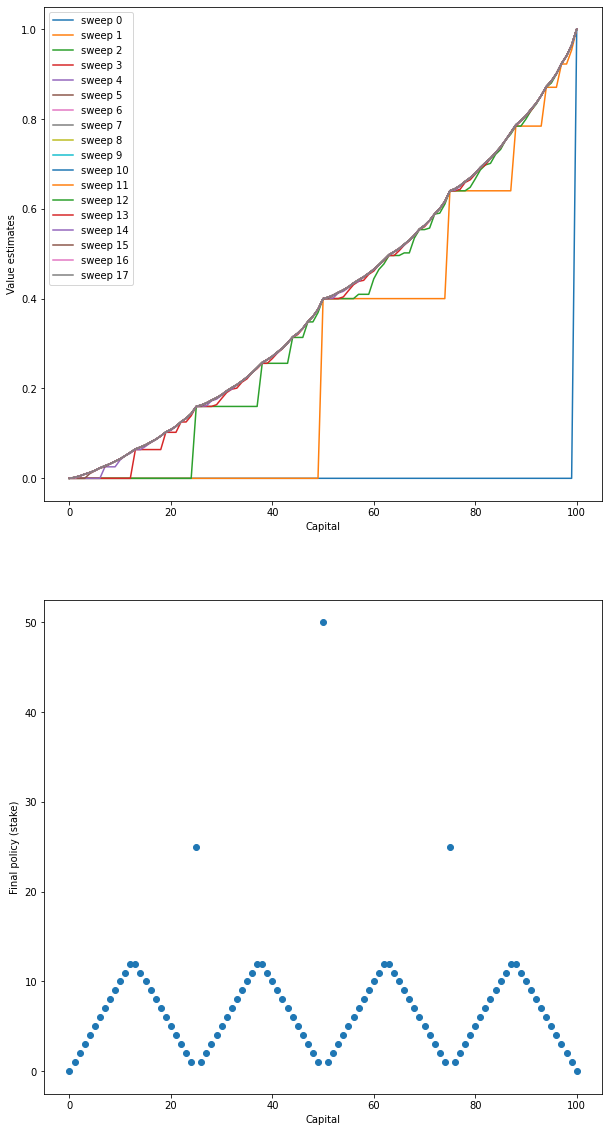

In [5]:
figure_4_3(head_prob=0.4, discount=1)

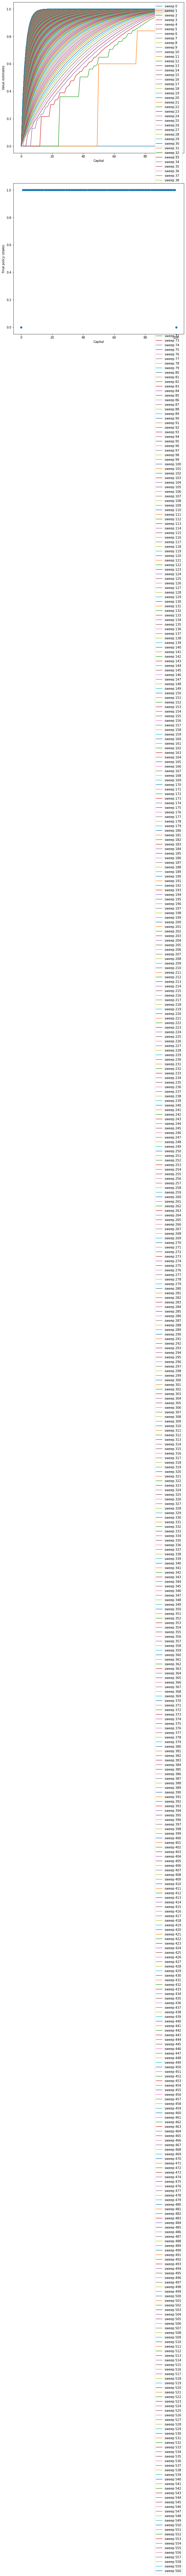

In [ ]:
figure_4_3(head_prob=0.6, discount=1)

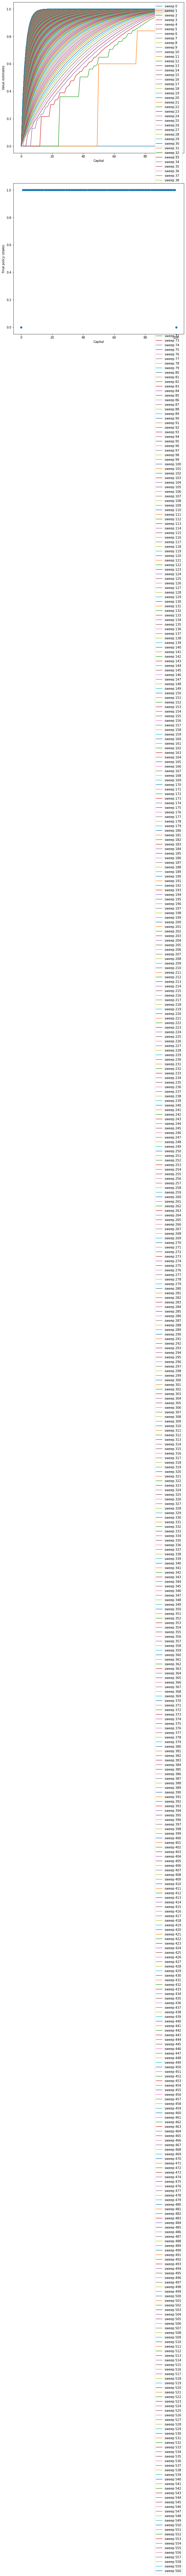

In [ ]:
figure_4_3()

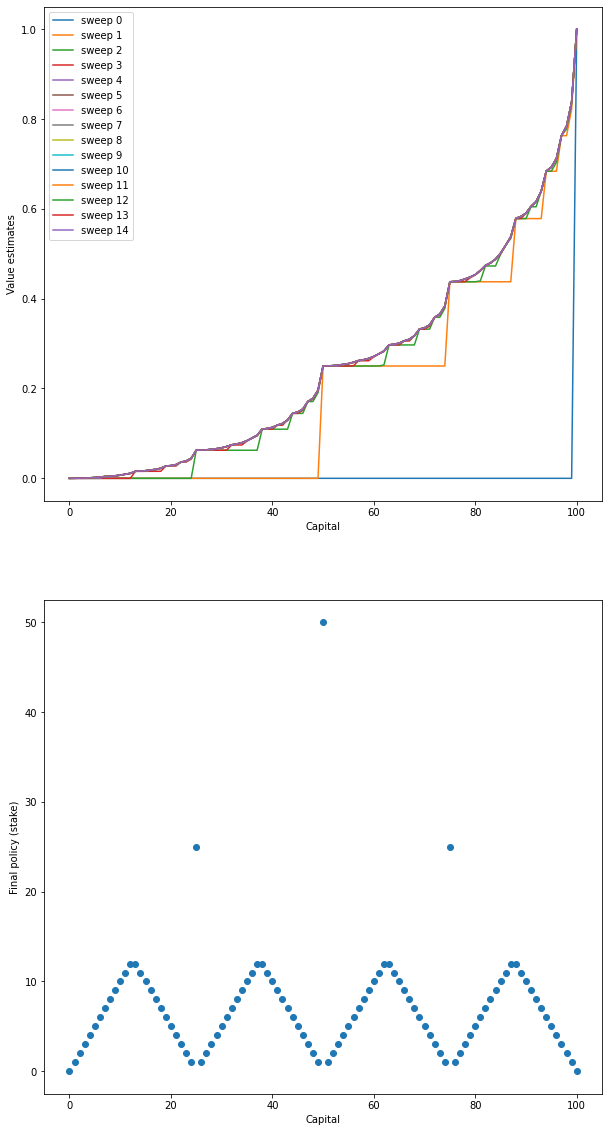

In [ ]:
figure_4_3(head_prob=0.25, discount=1)

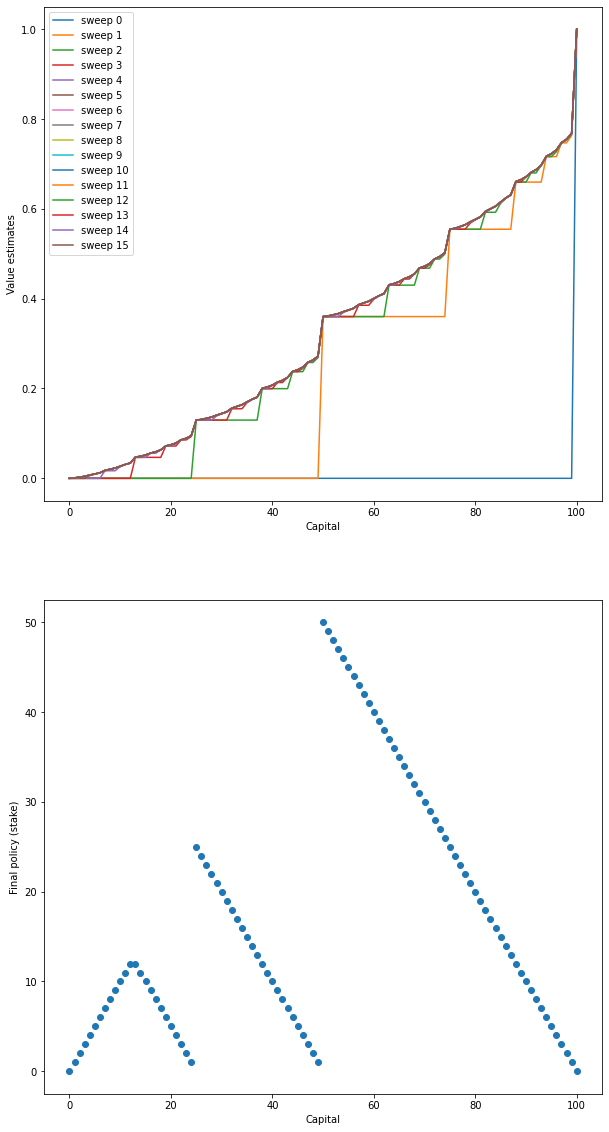

In [ ]:
figure_4_3(head_prob=0.4, discount=0.9)